In [1]:
import tensorflow as tf
import utils as ut
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

2024-01-10 18:20:50.656984: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 18:20:50.721056: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 18:20:50.721098: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 18:20:50.723411: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 18:20:50.733639: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 18:20:50.734651: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
data = ut.loadData("./models/data_binary")
labels = ut.loadData("./models/labels")
classes = ut.loadData("./models/classes")

In [3]:
for i in range(len(labels)):
    id = classes[labels[i]]
    labels[i] = id
data = [data[i]/255 for i in range(len(data))]


In [4]:
labels = np.array(labels, dtype=np.uint8)
data = np.array(data, dtype=np.uint8)
print(type(data))
print(type(labels))
assert data.shape[0] == labels.shape[0]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
print(len(data))
print(len(labels))

36576
36576


In [6]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.1)
print(len(data_train))
print(len(data_test))
print(len(labels_train))
print(len(labels_test))

32918
3658
32918
3658


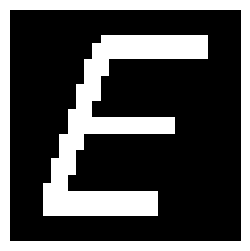

In [7]:
ut.show(data_train[0])

# ANN

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(
        input_shape = (28,28,1)
    )
    ,tf.keras.layers.Dense(
        units = 64
        ,activation="sigmoid"
    )
    ,tf.keras.layers.Dense(
        units = 128
        ,activation = "sigmoid"
    )
    ,tf.keras.layers.Dense(
        units = 256
        ,activation="sigmoid"
    )
    ,tf.keras.layers.Dense(
        units = 36
        ,activation = "softmax"
    )
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 36)                9252      
                                                                 
Total params: 100836 (393.89 KB)
Trainable params: 100836 (393.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-01-10 18:21:00.791268: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history =  model.fit(
    data_train
    ,labels_train
    ,epochs = 128
)

Epoch 1/128
1029/1029 [==============================] - 4s 3ms/step - loss: 1.9057 - accuracy: 0.5248
Epoch 2/128
1029/1029 [==============================] - 3s 3ms/step - loss: 0.6680 - accuracy: 0.8404
Epoch 3/128
1029/1029 [==============================] - 3s 3ms/step - loss: 0.4849 - accuracy: 0.8746
Epoch 4/128
1029/1029 [==============================] - 3s 3ms/step - loss: 0.3948 - accuracy: 0.8949
Epoch 5/128
1029/1029 [==============================] - 3s 3ms/step - loss: 0.3324 - accuracy: 0.9078
Epoch 6/128
1029/1029 [==============================] - 5s 5ms/step - loss: 0.2828 - accuracy: 0.9203
Epoch 7/128
1029/1029 [==============================] - 4s 4ms/step - loss: 0.2476 - accuracy: 0.9288
Epoch 8/128
1029/1029 [==============================] - 4s 4ms/step - loss: 0.2154 - accuracy: 0.9366
Epoch 9/128
1029/1029 [==============================] - 4s 4ms/step - loss: 0.1882 - accuracy: 0.9447
Epoch 10/128
1029/1029 [==============================] - 4s 4ms/step - l

In [10]:
model.evaluate(data_test, labels_test)

115/115 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.9265


[0.6214838624000549, 0.9264625310897827]

In [11]:
model.save("./models/ann_6")

INFO:tensorflow:Assets written to: ./models/ann_6/assets


INFO:tensorflow:Assets written to: ./models/ann_6/assets


# CNN

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        input_shape = (28,28,1)
    )
    ,tf.keras.layers.Dense(
        units = 64
        ,activation="relu"
    )
    ,tf.keras.layers.Dense(
        units = 128
        ,activation = "relu"
    )
    ,tf.keras.layers.Dense(
        units = 256
        ,activation="relu"
    )
    ,tf.keras.layers.Dense(
        units = 36
        ,activation = "softmax"
    )
])
model.summary()

# TEST

In [12]:
from tensorflow.keras.models import load_model
import data_preparation as dp
import cv2 as cv
import utils as ut

In [13]:
def find_key(item):
    for key, _item in classes.items():
        if item == _item:
            return key

In [14]:
def predict(img):
    ut.show(img[0])
    y = loaded_model.predict(img)
    y = y.tolist()
    y = y[0]
    ids = list(range(36))
    y = list(zip(y, ids))
    y = sorted(y, key = lambda y: y[0])
    print(y[-1])
    r = find_key(y[-1][1])
    print(r)


In [15]:
classes = ut.loadData("./models/classes")
print(classes)

{'B': 0, 'H': 1, '0': 2, 'Q': 3, 'V': 4, '9': 5, 'A': 6, 'K': 7, '4': 8, '5': 9, 'E': 10, '2': 11, 'G': 12, '7': 13, 'M': 14, 'U': 15, 'Y': 16, 'I': 17, 'W': 18, 'Z': 19, 'D': 20, 'P': 21, 'N': 22, 'S': 23, 'F': 24, '1': 25, '6': 26, '3': 27, 'L': 28, 'C': 29, 'X': 30, 'R': 31, '8': 32, 'O': 33, 'J': 34, 'T': 35}


In [18]:
# ann 5 works well
# ann 6 works well
loaded_model = load_model("./models/ann_6")
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 36)                9252      
                                                                 
Total params: 100836 (393.89 KB)
Trainable params: 100836 (393.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


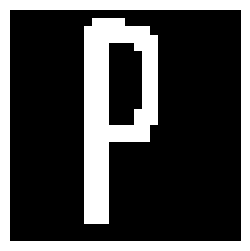

1/1 [==============================] - 0s 37ms/step
(0.999909520149231, 21)
P


In [33]:
img = cv.imread("/home/lenin/Documents/chars/p.png", cv.IMREAD_GRAYSCALE)
img = dp.prepare_img(img)
predict(img)
